In [39]:
import librosa
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, GRU, Flatten, Conv1D, MaxPooling1D
from keras.layers import BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder, StandardScaler
from algorithms import *
from scipy.stats import skew
from scipy.stats import skew, kurtosis

In [40]:
#extract development and evaulation
df = pd.read_csv("dsl_data/development.csv")
df_eval = pd.read_csv("dsl_data/evaluation.csv")

In [41]:
label_encoder(df, 'gender')
label_encoder(df_eval, 'gender')
label_encoder(df, 'ageRange')
label_encoder(df_eval, 'ageRange')

In [42]:
cols = ['Id','Self-reported fluency level ', 'First Language spoken', 'Current language used for work/school']
df.drop(columns=cols,inplace=True)
df_eval.drop(columns=cols[:4],inplace=True)

In [49]:
def extract_all_features(df):
        # Extract features for each audio
    for index,row in df.iterrows():
        y_untrimmed, sr = librosa.load(row["path"], mono=True)
        y, i = librosa.effects.trim(y_untrimmed, top_db=30, frame_length=2048, hop_length=512)
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        rmse = librosa.feature.rms(y=y)
        spec_cent = librosa.feature.spectral_centroid(y=y, sr=sr)
        spec_bw = librosa.feature.spectral_bandwidth(y=y, sr=sr)
        rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
        zcr = librosa.feature.zero_crossing_rate(y)
        mfcc = librosa.feature.mfcc(y=y, sr=sr)
        tonnetz = librosa.feature.tonnetz(y=y, sr=sr)
        spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
        spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)

        # Fill in the features for each audio
        df.at[index, "chroma_stft_mean"] = np.mean(chroma_stft)
        df.at[index, "chroma_stft_std"] = np.std(chroma_stft)
        df.at[index, "chroma_stft_min"] = np.min(chroma_stft)
        df.at[index, "chroma_stft_max"] = np.max(chroma_stft)

        df.at[index, "rmse_mean"] = np.mean(rmse)
        df.at[index, "rmse_std"] = np.std(rmse)
        df.at[index, "rmse_min"] = np.min(rmse)
        df.at[index, "rmse_max"] = np.max(rmse)

        df.at[index, "spectral_centroid_mean"] = np.mean(spec_cent)
        df.at[index, "spectral_centroid_std"] = np.std(spec_cent)
        df.at[index, "spectral_centroid_min"] = np.min(spec_cent)
        df.at[index, "spectral_centroid_max"] = np.max(spec_cent)

        df.at[index, "spectral_bandwidth_mean"] = np.mean(spec_bw)
        df.at[index, "spectral_bandwidth_std"] = np.std(spec_bw)
        df.at[index, "spectral_bandwidth_min"] = np.min(spec_bw)
        df.at[index, "spectral_bandwidth_max"] = np.max(spec_bw)
        
        df.at[index, "rolloff_mean"] = np.mean(rolloff)
        df.at[index, "rolloff__std"] = np.std(rolloff)
        df.at[index, "rolloff_min"] = np.min(rolloff)
        df.at[index, "rolloff_max"] = np.max(rolloff)

        df.at[index, "zero_crossing_rate_mean"] = np.mean(zcr)
        df.at[index, "zero_crossing_rate_std"] = np.std(zcr)
        df.at[index, "zero_crossing_rate_min"] = np.min(zcr)
        df.at[index, "zero_crossing_rate_max"] = np.max(zcr)

        for i in range(len(mfcc)):
            df.at[index, f"mfcc_mean{i + 1}"] = np.mean(mfcc[i])
            df.at[index, f"mfcc_std{i + 1}"] = np.std(mfcc[i])
            df.at[index, f"mfcc_min{i + 1}"] = np.min(mfcc[i])
            df.at[index, f"mfcc_max{i + 1}"] = np.max(mfcc[i])
             df.at[index, f"mfcc_skew{i + 1}"] = np.max(mfcc[i])
              df.at[index, f"mfcc_kurtosis{i + 1}"] = kurtosis(mfcc[i])
            

        for i in range(len(tonnetz)):
            df.at[index, f"tonnetz_mean{i + 1}"] = np.mean(tonnetz[i])
            df.at[index, f"tonnetz_std{i + 1}"] = np.std(tonnetz[i])
            df.at[index, f"tonnetz_min{i + 1}"] = np.min(tonnetz[i])
            df.at[index, f"tonnetz_max{i + 1}"] = np.max(tonnetz[i])
             df.at[index, f"tonnetz_skew{i + 1}"] = skew(tonnetz[i])
             df.at[index, f"tonnetz_kurtosis{i + 1}"] = kurtosis(tonnetz[i])


        for i in range(len(spectral_contrast)):
            df.at[index, f"spectral_contrast_mean{i + 1}"] = np.mean(spectral_contrast[i])
            df.at[index, f"spectral_contrast_std{i + 1}"] = np.std(spectral_contrast[i])
            df.at[index, f"spectral_contrast_min{i + 1}"] = np.min(spectral_contrast[i])
            df.at[index, f"spectral_contrast_max{i + 1}"] = np.max(spectral_contrast[i])
            df.at[index, f"spectral_contrast_skew{i + 1}"] = skew(spectral_contrast[i])
            df.at[index, f"spectral_contrast_kurtosis{i + 1}"] = kurtosis(spectral_contrast[i])


        for i in range(len(spectrogram)):
            df.at[index, f"spectral_contrast_mean{i + 1}"] = np.mean(spectrogram[i])
            df.at[index, f"spectral_contrast_std{i + 1}"] = np.std(spectrogram[i])
            df.at[index, f"spectral_contrast_min{i + 1}"] = np.min(spectrogram[i])
            df.at[index, f"spectral_contrast_max{i + 1}"] = np.max(spectrogram[i])
            df.at[index, f"spectral_contrast_kurtosis{i + 1}"] = kurtosis(spectrogram[i])

    return df



In [50]:
df = extract_all_features(df)

/Users/hadiibrahim/Dev/POLITO/DSL-Project/NLP-Intent-detection/venv/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=896
  return f(*args, **kwargs)
/Users/hadiibrahim/Dev/POLITO/DSL-Project/NLP-Intent-detection/venv/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=1024 is too small for input signal of length=448
  return f(*args, **kwargs)
/var/folders/sj/p6ljt_pn2qv80z471vxgw4w40000gn/T/ipykernel_9434/1463686825.py:67: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.at[index, f"spectral_contrast_std{i + 1}"] = np.std(spectrogram[i])
/var/folders/sj/p6ljt_pn2qv80z471vxgw4w40000gn/T/ipykernel_9434/1463686825.py:68: PerformanceWarning: DataFrame is highl

In [51]:
df_eval = extract_all_features(df_eval)

/var/folders/sj/p6ljt_pn2qv80z471vxgw4w40000gn/T/ipykernel_9434/1463686825.py:51: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.at[index, f"mfcc_min{i + 1}"] = np.min(mfcc[i])
/var/folders/sj/p6ljt_pn2qv80z471vxgw4w40000gn/T/ipykernel_9434/1463686825.py:52: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df.at[index, f"mfcc_max{i + 1}"] = np.max(mfcc[i])
/var/folders/sj/p6ljt_pn2qv80z471vxgw4w40000gn/T/ipykernel_9434/1463686825.py:49: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `fr

In [52]:
target_class = df['action']+ df['object']
encoder = LabelEncoder()
y = encoder.fit_transform(target_class)

In [53]:
X = df.drop(columns=['path', 'speakerId','action','object'])

In [54]:
scaler = StandardScaler()
X = scaler.fit_transform(np.array(X, dtype = float))

In [55]:
X_eval = df_eval.drop(columns=['path', 'speakerId' ])

In [56]:
# X_eval = normalize_dataframe(X_eval)

In [57]:
X_eval = scaler.fit_transform(np.array(X_eval, dtype = float))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [58]:
from keras import models
from keras import layers
model = Sequential()
model.add(Dense(512, input_shape=(X.shape[1],), activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(y), activation='softmax'))

In [59]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [60]:
history = model.fit(X,
                    y,
                    epochs=500,
                    batch_size=128)

Epoch 1/500
77/77 [==============================] - 1s 9ms/step - loss: 2.5736 - accuracy: 0.2995
Epoch 2/500
77/77 [==============================] - 1s 12ms/step - loss: 1.3116 - accuracy: 0.4489
Epoch 3/500
77/77 [==============================] - 1s 12ms/step - loss: 1.0992 - accuracy: 0.5426
Epoch 4/500
77/77 [==============================] - 1s 13ms/step - loss: 0.9523 - accuracy: 0.6070
Epoch 5/500
77/77 [==============================] - 1s 12ms/step - loss: 0.8213 - accuracy: 0.6607
Epoch 6/500
77/77 [==============================] - 1s 12ms/step - loss: 0.7278 - accuracy: 0.7041
Epoch 7/500
77/77 [==============================] - 1s 12ms/step - loss: 0.6347 - accuracy: 0.7429
Epoch 8/500
77/77 [==============================] - 1s 13ms/step - loss: 0.5593 - accuracy: 0.7787
Epoch 9/500
77/77 [==============================] - 1s 13ms/step - loss: 0.4803 - accuracy: 0.8106
Epoch 10/500
77/77 [==============================] - 1s 13ms/step - loss: 0.4333 - accuracy: 0.8379


KeyError: 'val_acc'

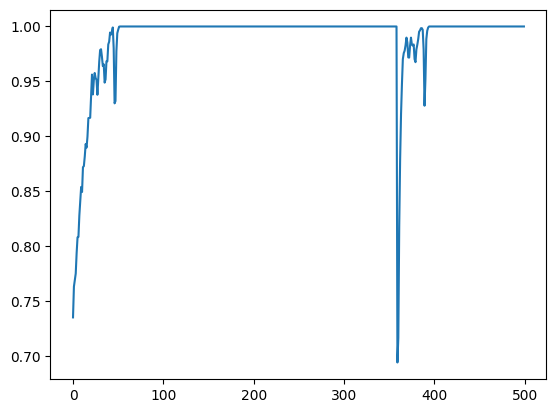

In [ ]:
# Plotting accuracy history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(X_test,y_test)
print('test_acc: ',test_acc)

In [61]:
predictions = model.predict(X_eval)


46/46 [==============================] - 0s 2ms/step


In [62]:
y_pred_classes = predictions.argmax(axis=-1)

# Convert the predicted class labels back to the original target classes
y_pred_classes_decoded = encoder.inverse_transform(y_pred_classes)

# Convert the decoded predictions to a pandas Series
y_pred_classes_decoded = pd.Series(y_pred_classes_decoded, name='Predicted')


In [63]:
y_pred_classes_decoded.to_csv('predictions.csv')

In [ ]:
def predict(model, X_test, le):
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_pred_labels = le.inverse_transform(y_pred_classes)
    y_pred_labels = pd.Series(y_pred_labels)
    return y_pred_labels